In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('Training.csv')


# 'fluid_overload' 都為0，Unnamed: 133 都 NA
data = data.drop(['fluid_overload','Unnamed: 133'],axis=1)

#刪除 相關係數=1.0
data = data.drop(['throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','enlarged_thyroid','enlarged_thyroid',
                  'brittle_nails','congestion','increased_appetite','receiving_blood_transfusion','coma','slurred_speech']
                 ,axis=1)
#刪除 相關係數=0.9
data = data.drop(['weight_gain','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','cramps','bruising','swollen_legs',
                 'cold_hands_and_feets','puffy_face_and_eyes','anxiety','knee_pain','spinning_movements','bladder_discomfort',
                  'passage_of_gases','weakness_of_one_body_side','toxic_look_(typhos)','mood_swings','irregular_sugar_level',
                  'yellow_urine','acute_liver_failure','swelling_of_stomach','distention_of_abdomen', 'history_of_alcohol_consumption',
                  'blister','red_sore_around_nose','small_dents_in_nails','silver_like_dusting','swollen_blood_vessels',
                  'drying_and_tingling_lips','swelling_joints','skin_peeling'],axis=1)
#刪除 0.9 以上
data = data.drop(['patches_in_throat','foul_smell_of urine','blackheads'],axis=1)

#sum()
data = data.drop(['pus_filled_pimples','unsteadiness','chest_pain','vomiting'],axis=1)

data.shape

(4920, 83)

In [2]:
test=pd.DataFrame()
for i in set(data['prognosis']):
    data1=data[data['prognosis']==i].sample(n=36)
    test=pd.concat([test,data1],axis=0)
X_test=test.drop(['prognosis'],axis=1)
y_test=test['prognosis']
X_train=data.drop(['prognosis'],axis=1)
y_train=data['prognosis']

In [7]:
# from sklearn.model_selection import train_test_split

# X = data.drop('prognosis', axis=1)  
# y = data['prognosis']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0003)

In [3]:
X_test.iloc[:1]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,receiving_unsterile_injections,stomach_bleeding,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,scurring,inflammatory_nails,yellow_crust_ooze
4563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
import time
time1=time.time()
KNN = KNeighborsClassifier(1)  
KNN.fit(X_train, y_train)  
y_pred = KNN.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')                          # 因是多分類須加參數 'weighted' 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy :{}".format(accuracy))
print("Precision:{}".format(precision))
print("Recall   :{}".format(recall))
print("F1-Score :{}".format(f1))
time2=time.time()
time3=time2-time1
print(time3)

Accuracy :1.0
Precision:1.0
Recall   :1.0
F1-Score :1.0
0.36160993576049805


In [5]:
X_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,receiving_unsterile_injections,stomach_bleeding,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,scurring,inflammatory_nails,yellow_crust_ooze
1372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3150,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1418,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4156,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import GridSearchCV

Turning_parameter = {'n_neighbors':range(1, 31, 2)}
Turning_KNN = GridSearchCV(KNeighborsClassifier(), Turning_parameter)

Turning_KNN.fit(X_train, y_train)
print(Turning_KNN.best_params_)  
print(Turning_KNN.score(X_test, y_test)) 


{'n_neighbors': 1}
1.0


In [8]:
import numpy as np
from sklearn.model_selection import learning_curve

size = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, valid_scores = \
    learning_curve(estimator=KNN,
                   X=data.drop(['prognosis'],axis=1), y=data['prognosis'],
                   train_sizes=size,
                   cv=10, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

最大平均值 : 1.0
所需的訓練樣本 : 442


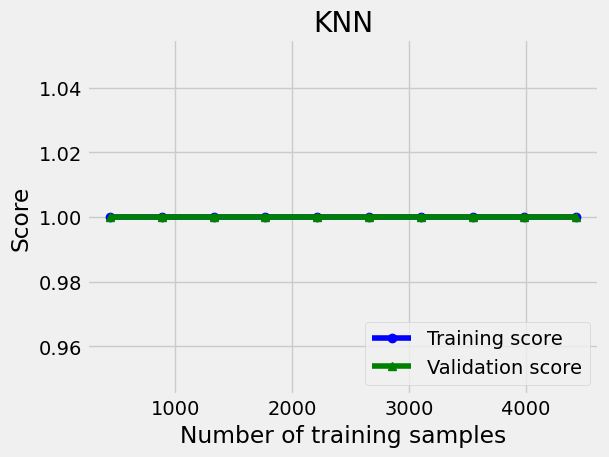

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(train_sizes, train_scores_mean, 
         color='blue', marker='o', 
         label='Training score')
plt.fill_between(train_sizes, 
                 train_scores_mean+train_scores_std, 
                 train_scores_mean-train_scores_std, 
                 color='blue', alpha=.1)
plt.plot(train_sizes, valid_scores_mean, 
         color='green', marker='^', 
         label='Validation score')
plt.fill_between(train_sizes, 
                 valid_scores_mean+valid_scores_std, 
                 valid_scores_mean-valid_scores_std, 
                 color='green', alpha=.1)
plt.title('KNN')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

max_valid_score_index = np.argmax(valid_scores_mean)
max_valid_score = valid_scores_mean[max_valid_score_index]

# 獲取對應的訓練集大小
optimal_train_size = train_sizes[max_valid_score_index]

# 打印結果
print(f"最大平均值 : {max_valid_score}")
print(f"所需的訓練樣本 : {optimal_train_size}")

In [10]:
max_valid_score_index = np.argmax(valid_scores_mean)
max_valid_score = valid_scores_mean[max_valid_score_index]

# 獲取對應的訓練集大小
optimal_train_size = train_sizes[max_valid_score_index]

# 打印結果
print(f"最大平均值 : {max_valid_score}")
print(f"所需的訓練樣本 : {optimal_train_size}")

最大平均值 : 1.0
所需的訓練樣本 : 442
